<h1 style="text-align:center;">TF2202 Teknik Komputasi - Persamaan Diferensial Parsial</h1>
<h3 style="text-align:center;">Fadjar Fathurrahman</h3>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("svg")

In [5]:
import matplotlib
#matplotlib.style.use("dark_background")
matplotlib.style.use("default")

# Persamaan Kalor 1d

Dalam satu dimensi spasial (misalkan x).

$$
\alpha \frac{\partial^{2}}{\partial x^2} u(x,t) = \frac{\partial}{\partial t} u(x,t)
$$

Domain:
- spasial: $0 \leq x \leq x_{f}$
- temporal: $0 \leq t \leq t_{f}$.

Syarat batas:
- $u(0,t) = b_{0}(t)$
- $u(x_{f},t) = b_{x_f}(t)$

Syarat awal:
- $u(x,0) = u_{0}(x)$ 

Catatan: persamaan yang sama juga digunakan untuk menjelaskan fenomena difusi.

## Metode Euler Eksplisit

Domain spasial dibagi menjadi $N_{x}$ segmen dengan $\Delta x = x_{f}/N_{x}$.

Domain temporal dibagi menjadi $N_{t}$ segmen dengan $\Delta t = t_{f}/N_{t}$.

Turunan parsial kedua terhadap $x$ diaproksimasi dengan menggunakan central difference.

Turunan parsial pertama terhadap $t$ diaproksimasi dengan forward difference.

Dengan menggunakan notasi berikut:
- $u(x,t) = u^{k}_{i}$
- $u(x+\Delta x,t) = u^{k}_{i+1}$
- $u(x-\Delta x,t) = u^{k}_{i-1}$
- $u(x,t+\Delta t) = u^{k+1}_{i}$
- $u(x,t-\Delta t) = u^{k-1}_{i}$

dapat dituliskan:

$$
\alpha \frac{u^{k}_{i+1} - 2u^{k}_{i} + u^{k}_{i-1}}{(\Delta x)^2} =
\frac{u^{k+1}_{i} - u^{k}_{i}}{\Delta t}
$$

Dengan menggunakan defisi:

$$
r = \alpha \frac{\Delta t}{(\Delta x)^2}
$$

Persamaan ini dapat dipecahkan untuk mendapatkan $u^{k+1}_{i}$

$$
u^{k+1}_{i} = r \left( u^{k}_{i+1} + u^{k}_{i-1} \right) + (1 - 2r) u^{k}_{i} 
$$

untuk $i = 1, 2, \ldots, N_{x}-1$.

Dapat ditunjukkan bahwa skema ini akan stabil jika:

$$
r = \alpha \frac{\Delta t}{(\Delta x)^2} \leq \frac{1}{2}
$$

### Implementasi

In [6]:
def heat_1d_euler_exp( alpha, xf, tf, u0x, bx0, bxf, Nx, Nt ):

    dx = xf/Nx
    x = np.linspace(0.0, xf, Nx+1)
    
    dt = tf/Nt
    t = np.linspace(0.0, tf, Nt+1)

    u = np.zeros( (Nx+1, Nt+1) )

    # Aplikasi syarat awal
    for i in range(Nx+1):
        u[i,0] = u0x( x[i] )
    
    # Syarat batas
    for k in range(Nt+1):
        u[0,k] = bx0( t[k] )
        u[Nx,k] = bxf( t[k] )
    
    r = alpha*dt/dx**2
    
    if r > 0.5:
        print("heat_1d_euler_exp:")
        print("WARNING: r lebih besar dari 0.5: %f\n" % r)
        print("WARNING: solusi tidak stabil !!")
    else:
        print("heat_1d_euler_exp:")
        print("r = %f >= 0.5\n" % r)
        print("Solusi seharusnya stabil")

    for k in range(0,Nt):
        for i in range(1,Nx):
            u[i,k+1] = r*( u[i+1,k] + u[i-1,k] ) + (1 - 2*r)*u[i,k]
    
    return u, x, t

### Contoh

Cari solusi numerik persamaan kalor:
$$
\frac{\partial^{2}}{\partial x^2} u(x,t) = \frac{\partial}{\partial t} u(x,t)
$$

pada domain:
- spasial: $0 \leq x \leq 1$
- temporal: $0 \leq t \leq 0.1$.

Syarat batas:
- $u(0,t) = 0$
- $u(1,t) = 0$

Syarat awal:
- $u(x,0) = \sin(\pi x)$ 

Bandingkan dengan solusi analitik:
$$
u(x,t) = \sin(\pi x) \exp(-\pi^2 t)
$$

In [7]:
# Syarat awal
def initial_temp( x ):
    return np.sin(np.pi*x)
# Syarat batas kiri
def bx0( t ):
    return 0.0
# Syarat batas kanan
def bxf( t ):
    return 0.0

In [8]:
def sol_01_analitik(x,t):
    return np.sin(np.pi*x)*np.exp(-np.pi**2 * t)

#### Kasus solusi stabil

In [9]:
# Dari soal atau masalah yang diberikan
alpha = 1.0
xf = 1.0
tf = 0.1

# ditentukan pengguna
Nx = 25
Nt = 200

u_exp, x_exp, t_exp = heat_1d_euler_exp( alpha, xf, tf, initial_temp, bx0, bxf, Nx, Nt )

heat_1d_euler_exp:
r = 0.312500 >= 0.5

Solusi seharusnya stabil


Plot hasilnya untuk beberapa nilai t.

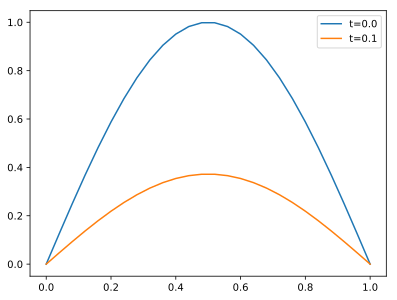

In [11]:
plt.clf()
plt.plot(x_exp, u_exp[:,0], label="t="+str(t_exp[0]))
plt.plot(x_exp, u_exp[:,-1], label="t="+str(t_exp[-1]))
plt.legend();

Perbandingan dengan solusi analitik.

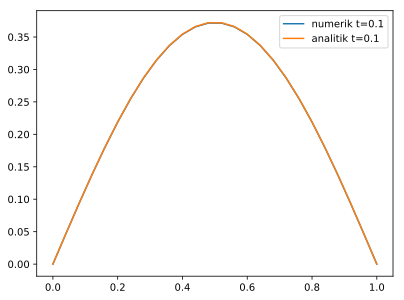

In [13]:
plt.clf()
plt.plot(x_exp, u_exp[:,-1], label="numerik t="+str(t_exp[-1]))
plt.plot(x_exp, sol_01_analitik(x_exp, t_exp[-1]), label="analitik t="+str(t_exp[-1]))
plt.legend();

Tulis frame2:

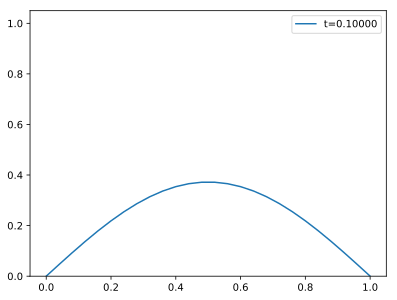

In [16]:
for k in range(Nt+1):
    plt.clf()
    plt.plot( x_exp, u_exp[:,k], label="t="+format("%.5f" % t_exp[k]))
    plt.legend();
    plt.ylim(0.0, 1.05)
    plt.savefig("TEMP_" + str(k) + ".png")

#### Kasus solusi tidak stabil

In [17]:
# Dari soal atau masalah yang diberikan
alpha = 1.0
xf = 1.0
tf = 0.1

# ditentukan pengguna
Nx = 50
Nt = 200

u_exp, x_exp, t_exp = heat_1d_euler_exp( alpha, xf, tf, initial_temp, bx0, bxf, Nx, Nt )

heat_1d_euler_exp:



Plot untuk beberapa nilai t (paling awal dan paling akhir) 

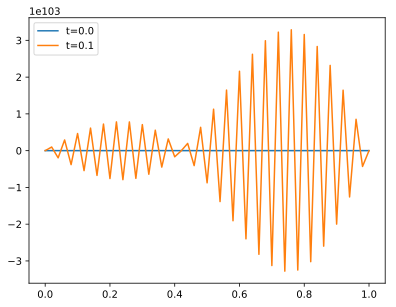

In [18]:
plt.clf()
plt.plot( x_exp, u_exp[:,0], label="t="+str(t_exp[0]))
plt.plot( x_exp, u_exp[:,-1], label="t="+str(t_exp[-1]))
plt.legend();

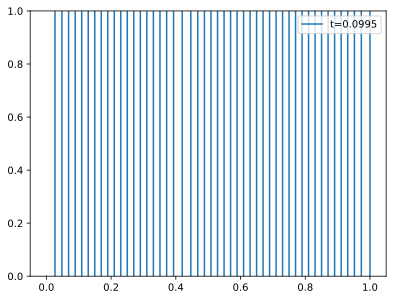

In [50]:
for k in range(Nt):
    plt.clf()
    plt.plot( x_exp, u_exp[:,k], label="t="+str(t_exp[k]))
    plt.legend();
    plt.ylim(0.0, 1.0)
    plt.savefig("TEMP_t_" + str(k) + ".png")

### Coba lagi

In [20]:
# Dari soal atau masalah yang diberikan
alpha = 1.0
xf = 1.0
tf = 0.1

# ditentukan pengguna
Nx = 50
Nt = 500

u_exp, x_exp, t_exp = heat_1d_euler_exp( alpha, xf, tf, initial_temp, bx0, bxf, Nx, Nt )

heat_1d_euler_exp:
r = 0.500000 >= 0.5

Solusi seharusnya stabil


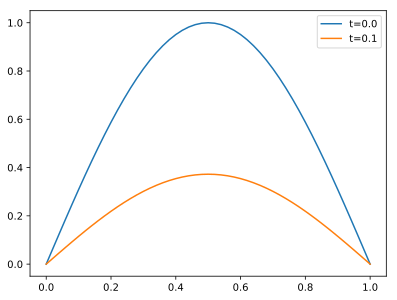

In [21]:
plt.clf()
plt.plot( x_exp, u_exp[:,0], label="t="+str(t_exp[0]))
plt.plot( x_exp, u_exp[:,-1], label="t="+str(t_exp[-1]))
plt.legend();

## Metode Euler implisit

Domain spasial dibagi menjadi $N_{x}$ segmen dengan $\Delta x = x_{f}/N_{x}$.

Domain temporal dibagi menjadi $N_{t}$ segmen dengan $\Delta t = t_{f}/N_{t}$.

Turunan parsial kedua terhadap $x$ diaproksimasi dengan menggunakan central difference.

Turunan parsial pertama terhadap $t$ diaproksimasi dengan backward difference.

$$
\alpha \frac{u^{k}_{i+1} - 2u^{k}_{i} + u^{k}_{i-1}}{(\Delta x)^2}
=
\frac{u^{k}_{i} - u^{k-1}_{i}}{\Delta t}
$$

Dengan menggunakan notasi:
$$
r = \alpha \frac{\Delta t}{(\Delta x)^2}
$$

Diperoleh persamaan implisit:
$$
-ru^{k}_{i-1}+ (1 + 2r)u^{k}_{i} - ru^{k}_{i+1} = u^{k-1}_{i}
$$
untuk $i = 1, 2, \ldots, N_{x}-1$.

Dalam bentuk matriks:
$$
\begin{bmatrix}
1 + 2r & -r & 0 & \cdot & 0 & 0 \\
-r & 1 + 2r & -r & \cdot & 0 & 0 \\
0 & -r & 1 + 2r & \cdot & 0 & 0 \\
\cdot & \cdot & \cdot & \cdot & \cdot & \cdot \\
0 & 0 & 0 & \cdot & 1 + 2r & -r \\
0 & 0 & 0 & \cdot & -r & 1 + 2r
\end{bmatrix}
\begin{bmatrix}
u^{k}_{1} \\
u^{k}_{2} \\
u^{k}_{3} \\
\cdot \\
u^{k}_{N_{x}-2} \\
u^{k}_{N_{x}-1}
\end{bmatrix} = 
\begin{bmatrix}
u^{k-1}_{1} + ru^{k}_{0} \\
u^{k-1}_{2} \\
u^{k-1}_{3} \\
\cdot \\
u^{k-1}_{N_{x}-2} \\
u^{k-1}_{N_{x}-1} + ru^{k}_{N_{x}}
\end{bmatrix}
$$

### Implementasi

Dalam kode di bawah ini akan didefinisikan matriks $\mathbf{A}$ sebagai matriks koefisien pada ruas kiri dan vektor $\mathbf{b}$ pada ruas kanan.

In [23]:
def heat_1d_euler_imp( alpha, xf, tf, u0x, bx0, bxf, Nx, Nt ):
    
    dx = xf/Nx
    x = np.linspace(0.0, xf, Nx+1)
    
    dt = tf/Nt
    t = np.linspace(0.0, tf, Nt+1)

    u = np.zeros( (Nx+1, Nt+1) ) 

    # Aplikasi syarat awal
    for i in range(Nx+1):
        u[i,0] = u0x( x[i] )
    
    # Syarat batas
    for k in range(Nt+1):
        u[0,k] = bx0( t[k] )
        u[Nx,k] = bxf( t[k] )
    
    r = alpha*dt/dx**2
    
    # Bangun matriks A
    A = np.zeros( (Nx-1,Nx-1) )
    for i in range(Nx-1):
        A[i,i] = 1 + 2*r
        if i > 0:
            A[i-1,i] = -r
            A[i,i-1] = -r
    
    # Bangun vektor b
    b = np.zeros(Nx-1)
    for k in range(1,Nt+1):
        b = np.copy(u[1:Nx,k-1])
        b[0] = b[0] + r*u[0,k]
        b[Nx-2] = b[Nx-2] + r*u[Nx,k]
        # Selesaikan sistem persamaan linear
        u[1:Nx,k] = np.linalg.solve(A, b)
    
    return u, x, t

### Contoh

Untuk parameter-parameter berikut, metode eksplisit stabil.

In [24]:
alpha = 1.0

# dari soal (deskripsi masalah)
xf = 1.0
tf = 0.1

# dari pengguna
Nx = 25
Nt = 200

u_imp, x_imp, t_imp = heat_1d_euler_imp( alpha, xf, tf, initial_temp, bx0, bxf, Nx, Nt )

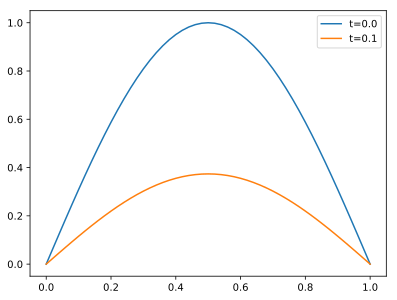

In [27]:
plt.clf()
plt.plot(x_imp, u_imp[:,0], label="t="+str(t_imp[0]))
plt.plot(x_imp, u_imp[:,-1], label="t="+str(t_imp[-1]))
plt.legend();

Untuk parameter-parameter berikut ini, metode eksplisit tidak stabil.

Bagaimana untuk metode implisit?

In [26]:
alpha = 1.0

xf = 1.0
tf = 0.1

Nx = 50
Nt = 200

u_imp, x_imp, t_imp = heat_1d_euler_imp( alpha, xf, tf, initial_temp, bx0, bxf, Nx, Nt )

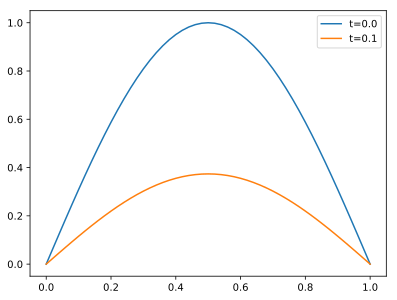

In [28]:
plt.clf()
plt.plot(x_imp, u_imp[:,0], label="t="+str(t_imp[0]))
plt.plot(x_imp, u_imp[:,-1], label="t="+str(t_imp[-1]))
plt.legend();

In [33]:
alpha = 1.0

xf = 1.0
tf = 0.2

Nx = 50
Nt = 200

u_imp, x_imp, t_imp = heat_1d_euler_imp( alpha, xf, tf, initial_temp, bx0, bxf, Nx, Nt )

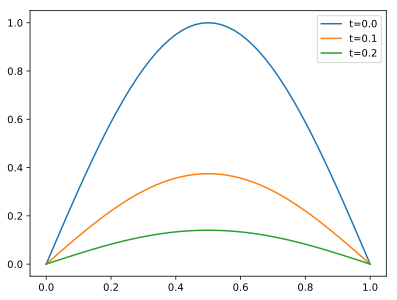

In [35]:
plt.clf()
plt.plot(x_imp, u_imp[:,0], label="t="+str(t_imp[0]))
plt.plot(x_imp, u_imp[:,100], label="t="+str(t_imp[100]))
plt.plot(x_imp, u_imp[:,-1], label="t="+str(t_imp[-1]))
plt.legend();

In [36]:
alpha = 1.0

xf = 1.0
tf = 0.2

Nx = 50
Nt = 200

u_exp, x_exp, t_exp = heat_1d_euler_exp( alpha, xf, tf, initial_temp, bx0, bxf, Nx, Nt )

heat_1d_euler_exp:



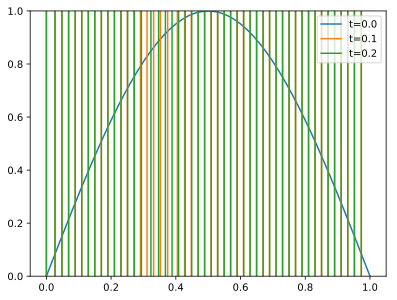

In [38]:
plt.clf()
plt.plot(x_exp, u_exp[:,0], label="t="+str(t_exp[0]))
plt.plot(x_exp, u_exp[:,100], label="t="+str(t_exp[100]))
plt.plot(x_exp, u_exp[:,-1], label="t="+str(t_exp[-1]))
plt.ylim(0.0, 1.0)
plt.legend();

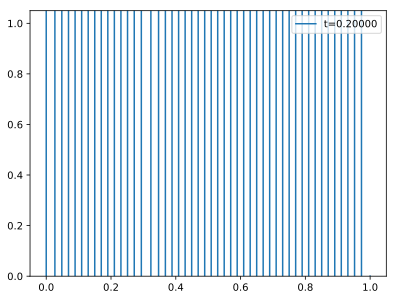

In [39]:
for k in range(Nt+1):
    plt.clf()
    plt.plot( x_exp, u_exp[:,k], label="t="+format("%.5f" % t_exp[k]))
    plt.legend();
    plt.ylim(0.0, 1.05)
    plt.savefig("TEMP_" + str(k) + ".png")

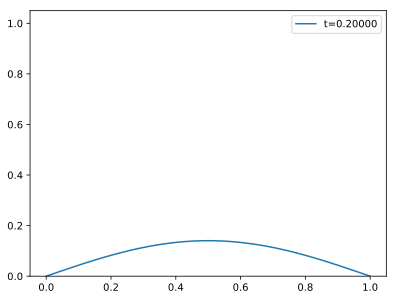

In [40]:
for k in range(Nt+1):
    plt.clf()
    plt.plot( x_imp, u_imp[:,k], label="t="+format("%.5f" % t_imp[k]))
    plt.legend();
    plt.ylim(0.0, 1.05)
    plt.savefig("TEMP_" + str(k) + ".png")

## Metode Crank-Nicholson

Metode Crank-Nicholson diperoleh dengan menggunakan rata-rata aproksimasi central difference antara titik waktu $k + 1$ dan $k$ sehingga diperoleh:

$$
\frac{\alpha}{2} \left(
\frac{u^{k+1}_{i+1} - 2u^{k+1}_{i} + u^{k+1}_{i-1}}{(\Delta x)^2} +
\frac{u^{k}_{i+1} - 2u^{k}_{i} + u^{k}_{i-1}}{(\Delta x)^2}
\right) = 
\frac{u^{k+1}_{i} - u^{k}_{i}}{\Delta t}
$$

atau:
$$
ru^{k+1}_{i+1} - 2ru^{k+1}_{i} + ru^{k+1}_{i-1} + ru^{k}_{i+1} - 2ru^{k}_{i} + ru^{k}_{i-1} = 2u^{k+1}_{i} - 2u^{k}_{i}
$$

$$
-ru^{k+1}_{i+1} + 2(1 + r)u^{k+1}_{i} - ru^{k+1}_{i-1} = ru^{k}_{i+1} + 2(1 - r)u^{k}_{i} + ru^{k}_{i-1}
$$

Dalam bentuk matriks:
$$
\mathbf{A}\mathbf{u}^{k+1} = \mathbf{B}\mathbf{u}^{k}
$$

dengan matriks sebagai berikut.

$$
\mathbf{A} = 
\begin{bmatrix}
2(1 + r) & -r & 0 & \cdot & 0 & 0 \\
-r & 2(1 + r) & -r & \cdot & 0 & 0 \\
0 & -r & 2(1 + r) & \cdot & 0 & 0 \\
\cdot & \cdot & \cdot & \cdot & \cdot & \cdot \\
0 & 0 & 0 & \cdot & 2(1 + r) & -r \\
0 & 0 & 0 & \cdot & -r & 2(1 + r)
\end{bmatrix}
$$

$$
\mathbf{B} = 
\begin{bmatrix}
2(1 - r) & r & 0 & \cdot & 0 & 0 \\
r & 2(1 - r) & r & \cdot & 0 & 0 \\
0 & r & 2(1 - r) & \cdot & 0 & 0 \\
\cdot & \cdot & \cdot & \cdot & \cdot & \cdot \\
0 & 0 & 0 & \cdot & 2(1 - r) & r \\
0 & 0 & 0 & \cdot & r & 2(1 - r)
\end{bmatrix}
$$

$$
\mathbf{u}^{k} =
\begin{bmatrix}
u^{k}_{1} \\
u^{k}_{2} \\
u^{k}_{3} \\
\cdot \\
u^{k}_{M-1} \\
u^{k}_{M}
\end{bmatrix}
$$


### Implementasi

In [69]:
def heat_1d_CN( alpha, xf, tf, u0x, bx0, bxf, Nx, Nt ):
    
    dx = xf/Nx
    x = np.linspace(0.0, xf, Nx+1)
    
    dt = tf/Nt
    t = np.linspace(0.0, tf, Nt+1)

    u = np.zeros( (Nx+1, Nt+1) ) 

    # Aplikasi syarat awal
    for i in range(Nx+1):
        u[i,0] = u0x( x[i] )
    
    # Syarat batas
    for k in range(Nt+1):
        u[0,k] = bx0( t[k] )
        u[Nx,k] = bxf( t[k] )
    
    r = alpha*dt/dx**2
    
    A = np.zeros( (Nx-1,Nx-1) )
    for i in range(Nx-1):
        A[i,i] = 2*(1 + r)
        if i > 0:
            A[i-1,i] = -r
            A[i,i-1] = -r

    B = np.zeros( (Nx-1,Nx-1) )
    for i in range(Nx-1):
        B[i,i] = 2*(1 - r)
        if i > 0:
            B[i-1,i] = r
            B[i,i-1] = r
    
    for k in range(1,Nt+1):
        b = np.matmul(B, u[1:Nx,k-1] )
        u[1:Nx,k] = np.linalg.solve(A, b)
    
    return u, x, t

### Contoh

In [70]:
alpha = 1.0

xf = 1.0
Nx = 25

tf = 0.1
Nt = 200

u_CN, x, t = heat_1d_CN( alpha, xf, tf, initial_temp, bx0, bxf, Nx, Nt )

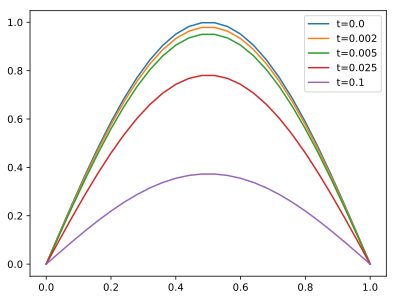

In [71]:
plt.clf()
plt.plot(x, u_CN[:,0], label="t="+str(t[0]))
plt.plot(x, u_CN[:,4], label="t="+str(t[4]))
plt.plot(x, u_CN[:,10], label="t="+str(t[10]))
plt.plot(x, u_CN[:,50], label="t="+str(t[50]))
plt.plot(x, u_CN[:,-1], label="t="+str(t[-1]))
plt.legend();

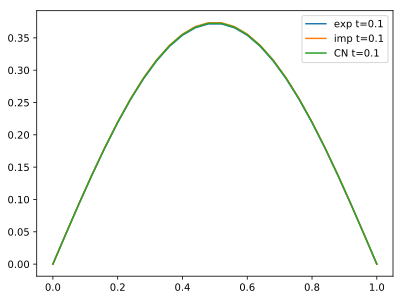

In [22]:
plt.clf()
plt.plot(x, u_exp[:,-1], label="exp t="+str(t[-1]))
plt.plot(x, u_imp[:,-1], label="imp t="+str(t[-1]))
plt.plot(x, u_CN[:,-1], label="CN t="+str(t[-1]))
plt.legend();

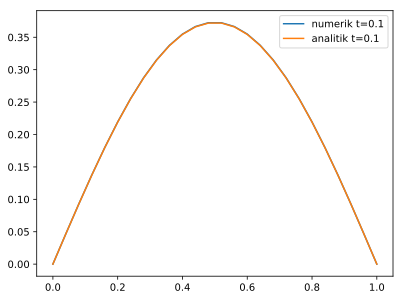

In [39]:
plt.clf()
plt.plot(x, u_CN[:,-1], label="numerik t="+str(t[-1]))
plt.plot(x, sol_01_analitik(x, t[-1]), label="analitik t="+str(t[-1]))
plt.legend();

## Latihan 1

Mirip dengan soal sebelumnya, hanya saja dengan syarat awal:

$$
u(x,0) = e^{-50(x-0.5)^2}
$$

In [81]:
# Syarat awal
def initial_temp( x ):
    return np.exp( -50*(x-0.5)**2 )

# Syarat batas kiri
def bx0( t ):
    return 0.0

# Syarat batas kanan
def bxf( t ):
    return 0.0

alpha = 1.0

xf = 1.0
Nx = 50

tf = 0.1
Nt = 200

u_imp, x_imp, t_imp = heat_1d_euler_imp( alpha, xf, tf, initial_temp, bx0, bxf, Nx, Nt )

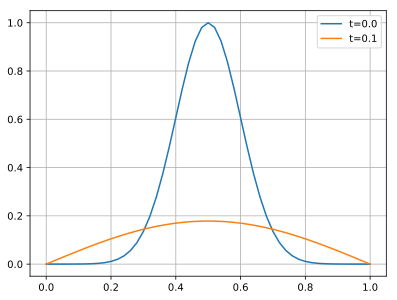

In [85]:
plt.clf()
plt.plot( x_imp, u_imp[:,0], label="t="+str(t_imp[0]) )
plt.plot( x_imp, u_imp[:,-1], label="t="+str(t_imp[-1]) )
plt.grid()
plt.legend()
#plt.plot( x_imp, u_imp[:,-1] )

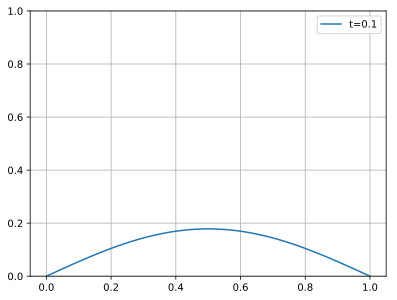

In [87]:
for k in range(Nt+1):
    plt.clf()
    plt.plot( x_imp, u_imp[:,k], label="t="+str(t_imp[k]) )
    plt.grid()
    plt.ylim(0,1)
    plt.legend()
    plt.savefig("TEMP_t_" + str(k) + ".png")

## Latihan 2

In [92]:
# Syarat awal
def initial_temp( x ):
    if x > 0.4 and x < 0.6:
        return 1.0
    else:
        return 0.0

# Syarat batas kiri
def bx0( t ):
    return 0.0

# Syarat batas kanan
def bxf( t ):
    return 0.0

alpha = 1.0

xf = 1.0
Nx = 50

tf = 0.1
Nt = 200

u_imp, x_imp, t_imp = heat_1d_euler_imp( alpha, xf, tf, initial_temp, bx0, bxf, Nx, Nt )

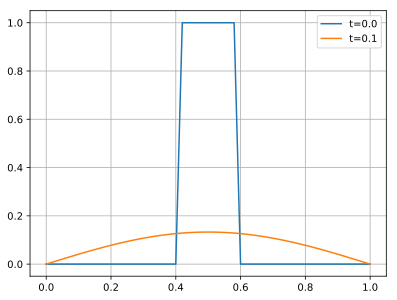

In [95]:
plt.clf()
plt.plot( x_imp, u_imp[:,0], label="t="+str(t_imp[0]) )
plt.plot( x_imp, u_imp[:,-1], label="t="+str(t_imp[-1]) )
plt.grid()
plt.legend()

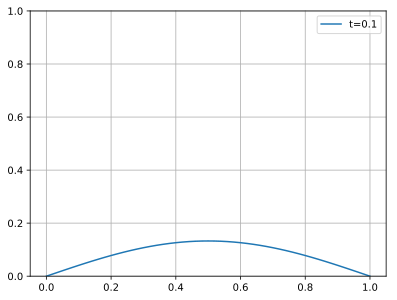

In [96]:
for k in range(Nt+1):
    plt.clf()
    plt.plot( x_imp, u_imp[:,k], label="t="+str(t_imp[k]) )
    plt.grid()
    plt.ylim(0,1)
    plt.legend()
    plt.savefig("TEMP_t_" + str(k) + ".png")

In [97]:
# Syarat awal
def initial_temp( x ):
    return 100*x**2 + 100

# Syarat batas kiri
def bx0( t ):
    return 100.0

# Syarat batas kanan
def bxf( t ):
    return 200.0

alpha = 1.0

xf = 1.0
Nx = 50

tf = 0.1
Nt = 200

u_imp, x_imp, t_imp = heat_1d_euler_imp( alpha, xf, tf, initial_temp, bx0, bxf, Nx, Nt )

In [ ]:
# u(x=0) = 100
# u(x=1) = 200
# -x**2

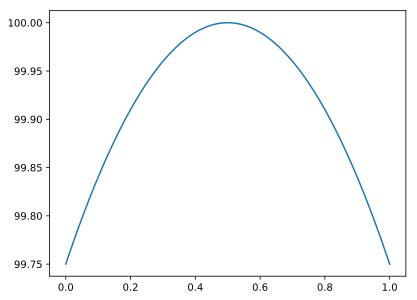

In [106]:
plt.clf()
x = np.linspace(0,1.0, 100)
plt.plot(x, 100 - (x - 0.5)**2)

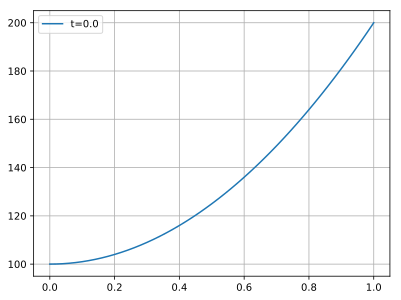

In [98]:
plt.clf()
plt.plot( x_imp, u_imp[:,0], label="t="+str(t_imp[0]) )
plt.grid()
plt.legend()

# Persamaan Kalor 2d

$$
\alpha \left( \frac{\partial^2}{\partial x^2} + \frac{\partial^2}{\partial y^2} \right) u(x,y,t)
= \frac{\partial}{\partial t} u(x,y,t)
$$

$$
\alpha \left(
\frac{u^{k}_{i,j+1} - 2u^{k}_{i,j} + u^{k}_{i-1,j}}{(\Delta x)^2} +
\frac{u^{k}_{i,j+1} - 2u^{k}_{i,j} + u^{k}_{i,j-1}}{(\Delta y)^2}
\right) = 
\frac{u^{k+1}_{i} - u^{k}_{i}}{\Delta t}
$$

ADI = alternating direction implicit

# Persamaan gelombang

$$
c^2
\frac{\partial^2}{\partial x^2} u(x,t) = 
\frac{\partial^2}{\partial t^2} u(x,t)
$$


$$
\frac{\partial^2}{\partial x^2} u(x,t) = 
\frac{1}{c^2} \frac{\partial^2}{\partial t^2} u(x,t)
$$

## Metode eksplisit untuk persamaan gelombang 1d

Persamaan gelombang:

$$
c^2 \frac{\partial^2}{\partial x^2} u(x,t) = \frac{\partial^2}{\partial t^2} u(x,t)
$$

Domain:
- $0 \leq x \leq x_{f}$
- $0 \leq t \leq t_{f}$

Syarat batas:
- $u(0,t) = b_{0}(t)$
- $u(x_{f},t) = b_{x_{f}}(t)$

Syarat awal:
- $u(x,0) = u_{0}(x)$
- $\left.\dfrac{\partial}{\partial t}u(x,t)\right|_{t=0} = u'_{0}(x)$

Gunakan centered difference untuk turuan kedua terhadap $x$ dan $t$:

$$
c^2 \frac{u^{k}_{i+1} - 2u^{k}_{i} + u^{k}_{i-1}}{(\Delta x)^2} =
\frac{u^{k+1}_{i} - 2u^{k}_{i} + u^{k-1}_{i}}{(\Delta t)^2}
$$

Dengan menggunakan definisi:

$$
r = c^2 \frac{(\Delta x)^2}{(\Delta t)^2}
$$

dapat dituliskan:

$$
u^{k+1}_{i} = r \left( u^{k}_{i+1} + u^{k}_{i-1} \right) + 
2(1 - r)u^{k}_{i} - u^{k-1}_{i}
$$

Untuk $k = 0$, kita memerlukan nilai untuk $u^{-1}_{i} = u(x_{i},-\Delta t)$:

$$
u^{1}_{i} = r \left( u^{0}_{i+1} + u^{0}_{i-1} \right) + 
2(1 - r)u^{0}_{i} - u^{-1}_{i}
$$

Dengan menggunakan aproksimasi centered diference untuk syarat awal:

$$
\frac{u^{1}_{i} - u^{-1}_{i}}{2\Delta t} = u'_{0}(x_{i})
$$

dapat diperoleh:

$$
u^{-1}_{i} = u^{1}_{i} - 2u'_{0}(x_{i}) \Delta t
$$

Sehingga untuk $k = 0$, kita peroleh:

$$
\begin{align*}
u^{1}_{i} & = r \left( u^{0}_{i+1} + u^{0}_{i-1} \right) + 
2(1 - r)u^{0}_{i} - \left( u^{1}_{i} - 2u'_{0}(x_{i}) \Delta t \right) \\
u^{1}_{i} & = \frac{1}{2} r \left( u^{0}_{i+1} + u^{0}_{i-1} \right) + 
(1 - r)u^{0}_{i} + u'_{0}(x_{i}) \Delta t
\end{align*}
$$

Kondisi untuk stabilitas:

$$
r = c^2 \frac{(\Delta t)^2}{(\Delta x)^2} \leq 1
$$

### Implementasi

In [41]:
def wave_1d_exp(c2, xf, tf, u0, u0p, bx0, bxf, Nx, Nt ):

    dx = xf/Nx
    x = np.linspace(0.0, xf, Nx+1)
    
    dt = tf/Nt
    t = np.linspace(0.0, tf, Nt+1)
    
    r = c2*(dt/dx)**2
    
    if r > 1.0:
        print("WARNING: propagasi tidak stabil")
        print("r = %f > 1\n" % r)
    
    u = np.zeros( (Nx+1,Nt+1) )
    
    # Syarat awal
    for i in range(Nx+1):
        u[i,0] = u0( x[i] ) 
        
    # Syarat batas
    for k in range(Nt+1):
        u[0,k]  = bx0( t[k] )
        u[Nx,k] = bxf( t[k] )
    
    for i in range(1,Nx):
        u[i,1] = 0.5*r*( u[i+1,0] + u[i-1,0] ) + (1.0 - r)*u[i,0] + dt*u0p( x[i] )
    
    for k in range(1,Nt):
        for i in range(1,Nx):
            u[i,k+1] = r*( u[i+1,k] + u[i-1,k] ) + 2*(1 - r)*u[i,k] - u[i,k-1]
    
    return u, x, t

### Contoh 1

In [42]:
def u0(x):
    return x*(1.0 - x)

def u0p(x):
    return 0.0

def bx0(t):
    return 0.0

def bxf(t):
    return 0.0

c2 = 1.0
xf = 1.0
Nx = 100
tf = 2.0
Nt = 200
u, x, t = wave_1d_exp(c2, xf, tf, u0, u0p, bx0, bxf, Nx, Nt)

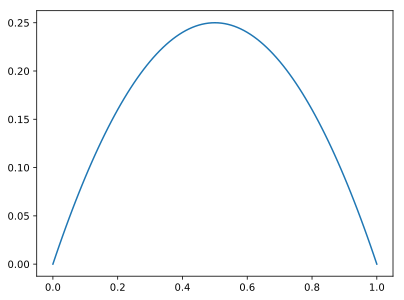

In [43]:
plt.clf()
plt.plot(x, u[:,0]);

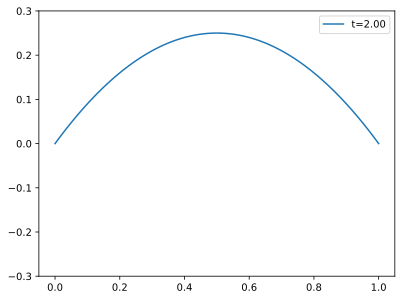

In [44]:
for k in range(Nt+1):
    plt.clf()
    plt.plot(x, u[:,k], label="t="+format("%.2f" % t[k]))
    plt.ylim(-0.3,0.3)
    plt.legend()
    plt.savefig("TEMP_" + str(k) + ".png")

### Contoh 2

In [46]:
def u0(x):
    return np.sin(4*np.pi*x)

def u0p(x):
    return 0.0

def bx0(t):
    return 0.0

def bxf(t):
    return 0.0

c2 = 1.0
xf = 1.0
Nx = 100
tf = 2.0
Nt = 200
u, x, t = wave_1d_exp(c2, xf, tf, u0, u0p, bx0, bxf, Nx, Nt)

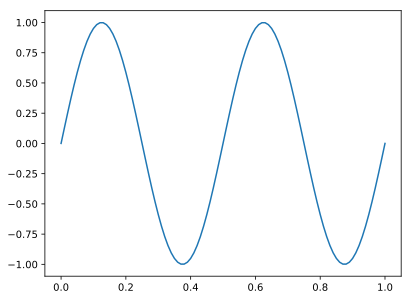

In [47]:
plt.clf()
plt.plot(x, u[:,0]);

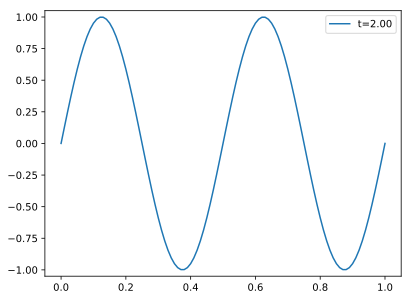

In [48]:
for k in range(Nt+1):
    plt.clf()
    plt.plot(x, u[:,k], label="t="+format("%.2f" % t[k]))
    plt.ylim(-1.05,1.05)
    plt.legend()
    plt.savefig("TEMP_" + str(k) + ".png")

### Contoh 3

In [49]:
def u0(x):
    return np.exp(-150*(x-0.25)**2)

def u0p(x):
    return 0.0

def bx0(t):
    return 0.0

def bxf(t):
    return 0.0

c2 = 1.0
xf = 1.0
Nx = 100
tf = 2.0
Nt = 200
u, x, t = wave_1d_exp(c2, xf, tf, u0, u0p, bx0, bxf, Nx, Nt)

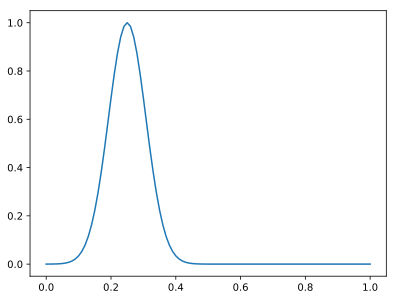

In [50]:
plt.clf()
plt.plot(x, u[:,0]);

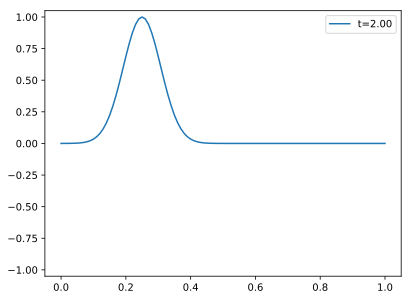

In [51]:
for k in range(Nt+1):
    plt.clf()
    plt.plot(x, u[:,k], label="t="+format("%.2f" % t[k]))
    plt.ylim(-1.05,1.05)
    plt.legend()
    plt.savefig("TEMP_" + str(k) + ".png")

### Travelling wave

In [60]:
def travel_wave(A, k, omega, x, t):
    return A*np.cos(omega*t - k*x)

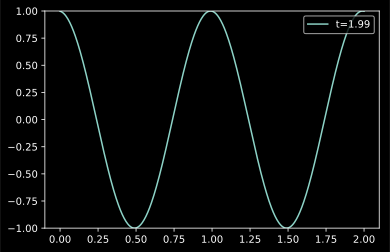

In [61]:
x0 = 0.0
xf = 2.0
x = np.linspace(x0, xf, 500)
A = 1.0
λ = 1.0
k = 2*np.pi/λ
T = 1.0
omega = 2*np.pi/T

t0 = 0.0
Nt = 200
delta_t = 0.01
for i in range(Nt):
    plt.clf()
    t = t0 + i*delta_t
    plt.plot(x, travel_wave(A, k, omega, x, t), label="t="+format("%.2f" % t))
    plt.ylim(-1.0, 1.0)
    plt.legend(loc="upper right")
    plt.savefig("TEMP_" + str(i) + ".png")

# Persamaan Laplace dan Poisson

Biasanya hanya bergantung pada variable spasial.

Persamaan Poisson:
$$
\nabla^2 u(x,y) = f(x,y)
$$

Persamaan Laplace:
$$
\nabla^2 u(x,y) = 0
$$

Untuk dua dimensi (spasial):

$$
\frac{\partial^2}{\partial x^2} u(x,y) +
\frac{\partial^2}{\partial y^2} u(x,y)
= f(x,y)
$$

Gunakan notasi:

- $u(x,y) = u_{i,j}$

- $u(x+\Delta x, y) = u_{i+1,j}$

- $u(x-\Delta x, y) = u_{i-1,j}$

- $u(x, y + \Delta y) = u_{i,j+1}$

- $u(x, y - \Delta y) = u_{i,j-1}$


Aproksimasi centered difference untuk turunan kedua:

$$
\frac{ u_{i+1,j} - 2u_{i,j} + u_{i-1,j} }{\Delta x^2} +
\frac{ u_{i,j+1} - 2u_{i,j} + u_{i,j-1} }{\Delta y^2} =
f_{i,j}
$$

Persamaan ini dapat dituliskan menjadi sistem persamaan linear:

$$
\mathbf{A} \mathbf{u} = \mathbf{f}
$$

# Persamaan adveksi (konveksi)

$$
\frac{\partial}{\partial t} u(x,t) + v \frac{\partial}{\partial x} = 0
$$

Domain:
- $0 \leq x \leq x_{f}$
- $0 \leq t \leq t_{f}$

Syarat batas (hanya pada bagian kiri):
- $u(0,t) = U_{0}$

Syarat awal:
- $u(x,0) = u^{0}(x)$

$$
\frac{u^{k+1}_{i} - u^{k}_{i}}{\Delta t} + v \frac{ u^{k}_{i+1} - u^{k}_{i-1} }{2\Delta x} = 0
$$

$$
u^{k+1}_{i} - u^{k}_{i} + v \frac{\Delta t}{2\Delta x} \left( u^{k}_{i+1} - u^{k}_{i-1} \right) = 0
$$

$$
u^{k+1}_{i} = u^{k}_{i} - \frac{1}{2} C \left( u^{k}_{i+1} - u^{k}_{i-1} \right)
$$

$$
C = v \frac{\Delta t}{\Delta x}
$$

In [107]:
def advect_1d_exp(v, xf, tf, u0, bx0, Nx, Nt ):

    dx = xf/Nx
    x = np.linspace(0.0, xf, Nx+1)
    
    dt = tf/Nt
    t = np.linspace(0.0, tf, Nt+1)
    
    # bilangan Courant
    C = v*dt/dx
    
    print("C = %f" % C)

    u = np.zeros( (Nx+1,Nt+1) )
    
    # Syarat awal
    for i in range(Nx+1):
        u[i,0] = u0( x[i] ) 
        
    # Syarat batas
    for k in range(Nt+1):
        u[0,k] = bx0( t[k] )
    
    for k in range(Nt):
        for i in range(1,Nx):
            u[i,k+1] = u[i,k] - 0.5*C*( u[i+1,k] - u[i-1,k] )
            #print("u = %d %d %18.10f" % (i, k+1, u[i,k+1]))
    
    return u, x, t

In [115]:
def u0(x):
    return np.exp( -150*(x-0.2)**2 )

def bx0(t):
    return 0.0

v = 1.0
xf = 1.0
tf = 0.2
Nx = 50
Nt = 1500

u, x, t = advect_1d_exp(v, xf, tf, u0, bx0, Nx, Nt )

C= 0.006667


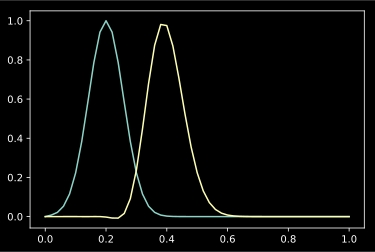

In [116]:
plt.clf()
plt.plot(x, u[:,0])
plt.plot(x, u[:,-1]);

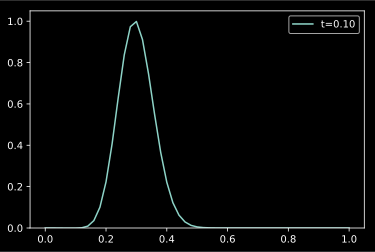

In [102]:
for k in range(Nt+1):
    plt.clf()
    plt.plot(x, u[:,k], label="t="+format("%.2f" % t[k]))
    plt.ylim(0.0, 1.05)
    plt.legend()
    plt.savefig("TEMP_" + str(k) + ".png")

## Leapfrog

$$
u^{k+1}_{i} = u^{k-1}_{i} - C^2 \left( u^{k}_{i+1} - u^{k}_{i-1} \right)
$$

# Old (kuliah 14 April 2019)

Rentang x = 0 sampai dengan x = 1, dengan selang diskritisasi h = 0.25

In [4]:
h = 0.25
A = 0.0
B = 1.0
Nx = int( (B-A)/h ) + 1
Nx

5

In [6]:
x = np.linspace(A,B, Nx)
x

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

Waktu t = 0 sampai dengan t = 1, dengan selang k = 0.25

In [33]:
k = 0.025
tmin = 0.0
tmax = 1.0
Nt = int( (tmax-tmin)/k ) + 1
Nt

41

Array suhu, dua dimensi

In [35]:
T = np.zeros( (Nx,Nt) )

Aplikasi syarat batas t = 0 (atau syarat awal)

$$
T(x, t=0) = \sin(\pi x )
$$

In [37]:
T[:,0] = np.sin(np.pi * x)

Text(0.0, 1.0, 't = 0')

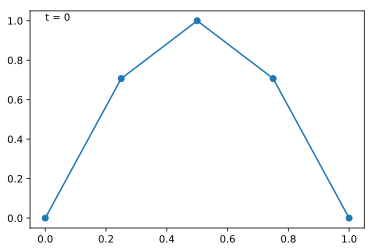

In [38]:
plt.clf()
plt.plot(x, T[:,0], marker="o")
plt.text( 0.0, 1.0, "t = 0")

Metode eksplisit
$$
T(x,t+k) = \lambda T(x-h,t) + (1-2\lambda)*T(x,t) + \lambda T(x+h,t)
$$


In [39]:
λ = k/h**2
λ

0.4

Mulai time-stepping dari t = 0 ke t selanjutnya t = 0 + k = k

In [42]:
# T[i,t] adalah T[xi,t]
idx_time = 1
for i in range(1,Nx-1):
    T[i,idx_time] = λ*T[i-1,idx_time-1] - (1 - 2*λ)*T[i,idx_time-1] + λ*T[i+1,idx_time-1]

Text(0.0, 0.9, 't = 0.025')

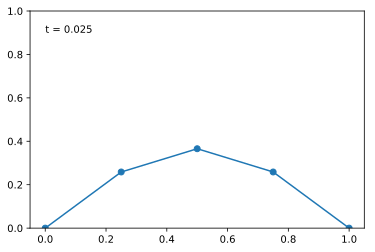

In [45]:
plt.clf()
plt.plot(x, T[:,idx_time], marker="o")
plt.ylim(0,1)
plt.text( 0.0, 0.9, "t = 0.025")

In [46]:
# T[i,t] adalah T[xi,t]
idx_time = 2
for i in range(1,Nx-1):
    T[i,idx_time] = λ*T[i-1,idx_time-1] - (1 - 2*λ)*T[i,idx_time-1] + λ*T[i+1,idx_time-1]

Text(0.0, 0.9, 't = 0.05')

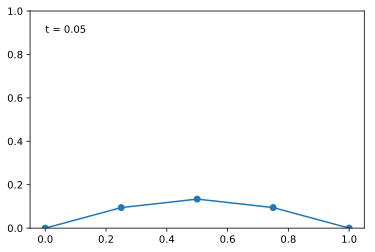

In [47]:
plt.clf()
plt.plot(x, T[:,idx_time], marker="o")
plt.ylim(0,1)
plt.text( 0.0, 0.9, "t = 0.05")

Untuk semua waktu, gunakan loop

In [52]:
for idx_time in range(1,Nt):
    for i in range(1,Nx-1):
        T[i,idx_time] = λ*T[i-1,idx_time-1] - (1 - 2*λ)*T[i,idx_time-1] + λ*T[i+1,idx_time-1]

Misalkan kita ingin mengetahui distribusi suhu pada t = 0.5, atau indeks t = 20

In [55]:
t = k*20
t

0.5

Text(0.0, 0.9, 't = 0.5')

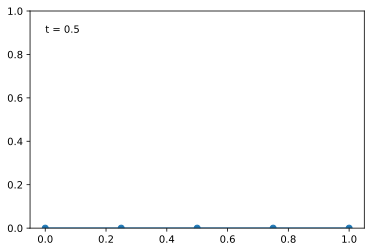

In [56]:
plt.clf()
plt.plot(x, T[:,20], marker="o")
plt.ylim(0,1)
plt.text( 0.0, 0.9, "t = 0.5")

Text(0.0, 0.9, 't = 0.25')

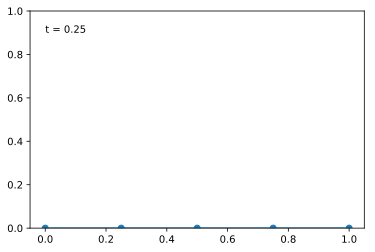

In [57]:
plt.clf()
plt.plot(x, T[:,10], marker="o")
plt.ylim(0,1)
plt.text( 0.0, 0.9, "t = 0.25")

In [74]:
def my_gaussian(x, center, alpha):
    return np.exp( -alpha*(x - center)**2 )

Nx =  21
Nt =  1001


Text(0, 0.9, 't = 0')

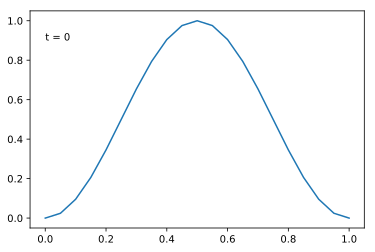

In [114]:
h = 0.05
A = 0.0
B = 1.0
center = 0.5
alpha = 1000
Nx = int( (B-A)/h ) + 1
print("Nx = ", Nx)
x = np.linspace(A, B, Nx)

k = 0.001
tmin = 0.0
tmax = 1.0
Nt = int( (tmax-tmin)/k ) + 1
print("Nt = ", Nt)

t = np.linspace(tmin, tmax, Nt)

T = np.zeros( (Nx,Nt) )

# Syarat awal
T[:,0] = np.sin(np.pi*x)**2

plt.clf()
plt.plot(x, T[:,0])
plt.text(0, 0.9, "t = 0")

In [117]:
λ = k/h**2
print("λ = ", λ)

for idx_time in range(1,Nt):
    for i in range(1,Nx-1):
        T[i,idx_time] = λ*T[i-1,idx_time-1] - (1 - 2*λ)*T[i,idx_time-1] + λ*T[i+1,idx_time-1]

λ =  0.3999999999999999


Text(0, 0.9, 't = 0.0001')

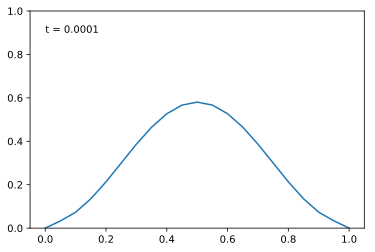

In [119]:
plt.clf()
plt.plot(x, T[:,1])
plt.ylim(0,1)
plt.text(0, 0.9, "t = 0.0001")

In [110]:
my_gaussian(0.0, center, alpha)

2.6691902155412764e-109